[2011 2012 2013 2014 2015 2016 2017 2018]
[2, 7, 3, 5, 29, 123, 1614, 1710]


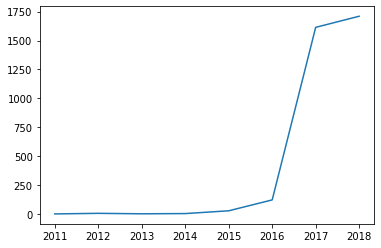

2011 2
2012 7
2013 3
2014 5
2015 29
2016 123
2017 1614
2018 1710


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

amazon_job = pd.read_csv("amazon_jobs_dataset.csv")

amazon_job['year'] = amazon_job['Posting_date'].str.slice(start=-4)

yearJob = amazon_job.groupby('year')

data = amazon_job['year'].astype(int).unique()
np.asarray(data).sort()
#print(data)
jobCount = []
for i in data:
    value = yearJob.get_group(str(i))
    jobCount.append(value.shape[0])
    
#print(data)
#print(jobCount)

plt.plot(data,jobCount)

plt.show()

for i,value in enumerate(data):
    print(value,jobCount[i],sep=" ")


April 58
August 153
December 393
February 869
January 961
July 95
June 99
March 78
May 108
November 271
October 243
September 165


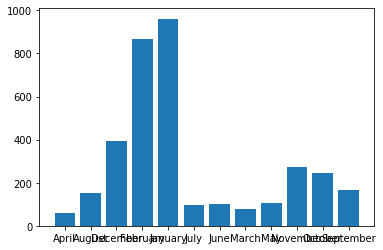

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

amazon_job = pd.read_csv("amazon_jobs_dataset.csv")

amazon_job[['month','day','year']] = amazon_job['Posting_date'].str.split(expand=True,)

monthJob = amazon_job.groupby('month')


data = amazon_job['month'].astype(str).unique()
np.asarray(data).sort()
#print(data)
jobCount = []
for i in data:
    value = monthJob.get_group(str(i))
    jobCount.append(value.shape[0])
    
#print(jobCount)

for i,value in enumerate(data):
    print(value,jobCount[i],sep=" ")

plt.bar(data,jobCount,width=0.8)

plt.show()


['Bangalore ' 'Hyderabad ' 'Chennai ' 'Gurgaon ' 'Pune ']


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


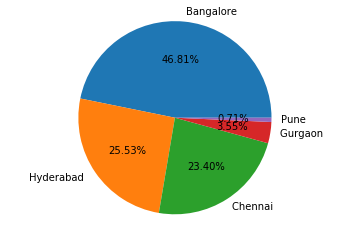

Bangalore 46.81%
Hyderabad 46.81%
Chennai 46.81%
Gurgaon 3.55%
Pune 0.71%


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

amazon_job = pd.read_csv("amazon_jobs_dataset.csv")

onlyIndia = amazon_job['location'].str.startswith("IN",na=False)

indiaAmazonJobData = amazon_job[onlyIndia]

indiaAmazonJobData['City'] = indiaAmazonJobData['location'].str.split(", ",expand=True)[2]

groupByCity = indiaAmazonJobData.groupby('City')

data = indiaAmazonJobData['City'].astype(str).unique()

print(data)

jobCount = []
for i in data:
    value = groupByCity.get_group(i)
    jobCount.append(value.shape[0])
    
#print(jobCount)
sumJobCount = np.array(jobCount).sum()
#print(sumJobCount)

plt.pie(jobCount,labels=data,autopct="%.2f%%")
plt.axis("equal")
plt.show()

print("Bangalore","46.81%",sep=" ")
print("Hyderabad","46.81%",sep=" ")
print("Chennai","46.81%",sep=" ")
print("Gurgaon","3.55%",sep=" ")
print("Pune","0.71%",sep=" ")

Bangalore     66
Hyderabad     36
Chennai       33
Gurgaon        5
Pune           1
Name: 2, dtype: int64


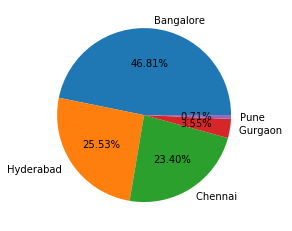

Bangalore  46.808510638297875
Hyderabad  25.53191489361702
Chennai  23.404255319148938
Gurgaon  3.546099290780142
Pune  0.7092198581560284


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

amazon_job = pd.read_csv("amazon_jobs_dataset.csv")

onlyIndia = amazon_job['location'].str.split(", ",expand=True)

indiaAmazonJobData = onlyIndia[0] == 'IN'

india_city = onlyIndia[indiaAmazonJobData][2]

freq = india_city.value_counts()
print(freq)

x = freq.index

plt.pie(freq,labels=x,autopct='%.2f%%')

plt.show()

perc = np.true_divide(freq,freq.sum(axis=0))*100
for i in range(len(x)):
    print(x[i],perc[i],sep=" ")

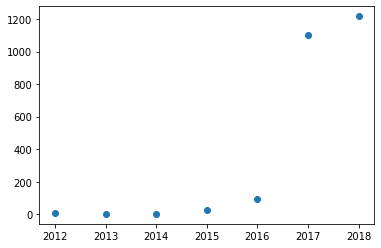

2012 6
2013 2
2014 4
2015 25
2016 95
2017 1104
2018 1217


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

amazon_job = pd.read_csv("amazon_jobs_dataset.csv",encoding='utf-8')

jobRelatedtoJava = amazon_job['BASIC QUALIFICATIONS'].str.contains("Java",case=False,regex=False)


jobRelatedtoJava = jobRelatedtoJava.fillna(False)

amazon_job = amazon_job[jobRelatedtoJava]
amazon_job['year'] = amazon_job['Posting_date'].str.slice(start=-4)

yearJob = amazon_job.groupby('year')

data = amazon_job['year'].astype(int).unique()
np.asarray(data).sort()
#print(data)
jobCount = []
for i in data:
    value = yearJob.get_group(str(i))
    jobCount.append(value.shape[0])
    
plt.scatter(data,jobCount)
plt.show()

for i,value in enumerate(data):
    print(value,jobCount[i],sep=" ")


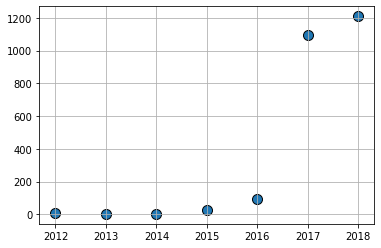

2012 6
2013 2
2014 4
2015 25
2016 95
2017 1093
2018 1210


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("amazon_jobs_dataset.csv",encoding='utf-8')

year = data['Posting_date'].str.split(', ',expand=True)[1]
basic_qualification = data['BASIC QUALIFICATIONS']
array = np.array(list(zip(year,basic_qualification)))
for i in range(len(array)):
    if 'Java' in array[i][1] or 'java' in array[i][1]:
        array[i][1] = 1
    else:
        array[i][1] = 0
        
array = array[array[:,1] == '1']
array = array[:,0]
year = np.unique(array)

job = []

for i in year:
    job.append(len(array[array == i]))

plt.scatter(year,job,edgecolors='black',s=100)
plt.grid()
plt.show()

for i in range(len(year)):
    print(year[i],job[i])